In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install -qU koreanize-matplotlib konlpy tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 25.2 MB/s eta 0:00:00


<Axes: title={'center': '한글'}>

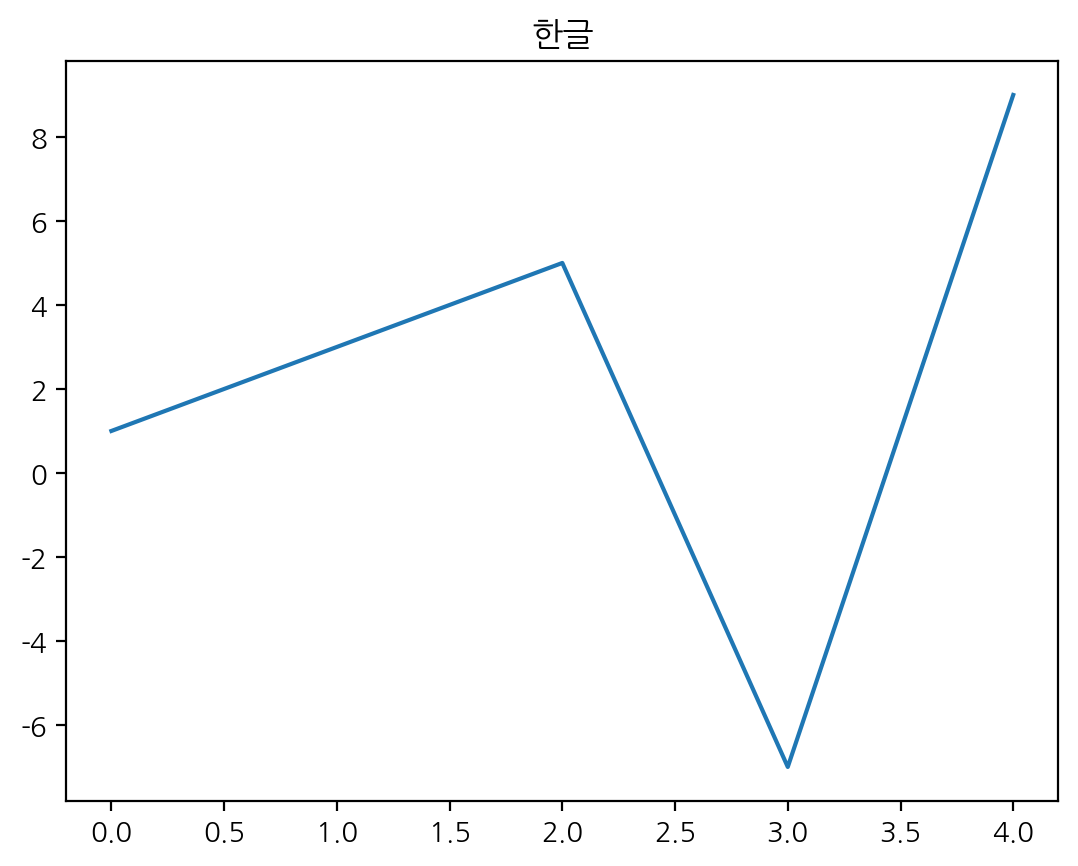

In [3]:
import koreanize_matplotlib
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
pd.Series([1, 3, 5, -7, 9]).plot(title="한글")

In [4]:
import os , platform

path = '/content/drive/MyDrive/텍스트마이닝/data/data_klue/data/klue'


In [5]:
pd.read_csv(path + '/train_data.csv')

,index,title,topic_idx
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4
...,...,...,...
45649,45649,KB금융 미국 IB 스티펠과 제휴…선진국 시장 공략,1
45650,45650,1보 서울시교육청 신종코로나 확산에 개학 연기·휴업 검토,2
45651,45651,게시판 키움증권 2020 키움 영웅전 실전투자대회,1
45652,45652,답변하는 배기동 국립중앙박물관장,2


In [6]:
train = pd.read_csv(path + '/train_data.csv')
test = pd.read_csv(path + '/test_data.csv')
topic = pd.read_csv(path + '/topic_dict.csv')


In [7]:
print(train.shape)
print(test.shape)
print(topic.shape)


(45654, 3)
(9131, 2)
(7, 2)


In [8]:
train.head()

,index,title,topic_idx
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4


In [9]:
topic['topic'].values

array(['IT과학', '경제', '사회', '생활문화', '세계', '스포츠', '정치'], dtype=object)

전처리(데이터 병합)

In [10]:
#데이터 병합(concat)

pd.concat([train, test])

,index,title,topic_idx
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0
...,...,...,...
9126,54780,인천 오후 3시35분 대설주의보…눈 3.1cm 쌓여,NaN
9127,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건종합,NaN
9128,54782,40년 전 부마항쟁 부산 시위 사진 2점 최초 공개,NaN
9129,54783,게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계,NaN


In [11]:
raw = pd.concat([train, test])
raw.shape

(54785, 3)

In [12]:
df = raw.copy()

In [13]:
df = df.merge(topic, how='left')

In [14]:
df

,index,title,topic_idx,topic
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0,세계
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0,세계
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0,세계
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0,세계
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0,세계
...,...,...,...,...
54780,54780,인천 오후 3시35분 대설주의보…눈 3.1cm 쌓여,NaN,NaN
54781,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건종합,NaN,NaN
54782,54782,40년 전 부마항쟁 부산 시위 사진 2점 최초 공개,NaN,NaN
54783,54783,게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계,NaN,NaN


In [15]:
test.isna().sum()

index    0
title    0
dtype: int64

In [16]:
train.isna().sum()


index        0
title        0
topic_idx    0
dtype: int64

In [17]:
df.isna().sum()


index           0
title           0
topic_idx    9131
topic        9131
dtype: int64

In [18]:
df['topic_idx'].value_counts()

topic_idx
4.0    7629
2.0    7362
5.0    6933
6.0    6751
1.0    6222
3.0    5933
0.0    4824
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='topic'>

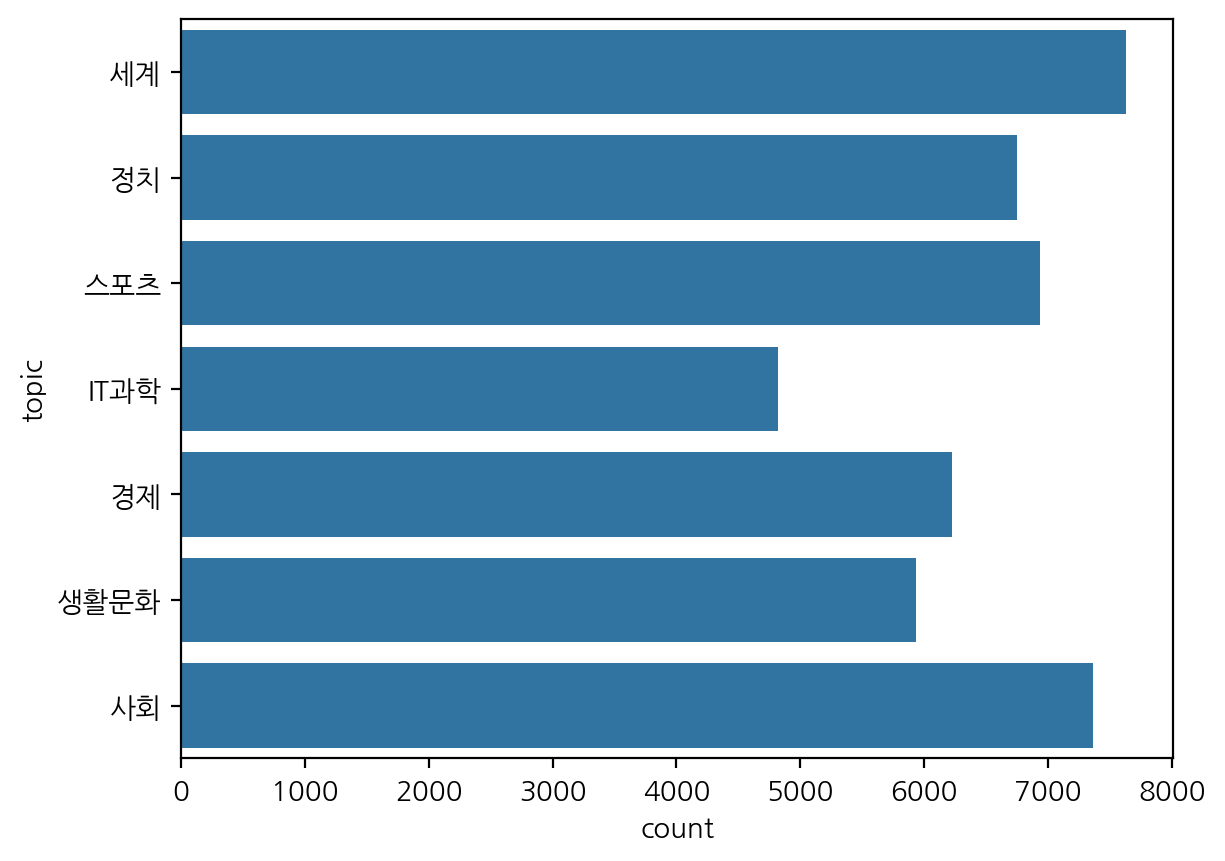

In [19]:
sns.countplot(y='topic', data=df)

In [20]:
len(df['title'])

54785

In [21]:
df['title'].apply(lambda x : len(x))

0        24
1        30
2        30
3        32
4        25
         ..
54780    28
54781    29
54782    28
54783    29
54784    31
Name: title, Length: 54785, dtype: int64

In [22]:
# 문자길이 len 파생변수 생성
df['len'] = df['title'].apply(lambda x : len(x))
df.head()

,index,title,topic_idx,topic,len
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0,세계,24
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0,세계,30
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0,세계,30
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0,세계,32
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0,세계,25


In [23]:
#각 title에 있는 글을 공백 기준으로 나눈 단어의 개수
df['word_count'] = df['title'].apply(lambda x : len(x.split()))
df.head()

,index,title,topic_idx,topic,len,word_count
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0,세계,24,5
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0,세계,30,6
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0,세계,30,8
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0,세계,32,7
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0,세계,25,7


In [24]:
#유일한 어절(단어) 빈도수 unique_word_count 파생변수 생성

df['unique_word_count'] = df['title'].apply(lambda x : len(set(x.split())))
df.head()

,index,title,topic_idx,topic,len,word_count,unique_word_count
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0,세계,24,5,5
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0,세계,30,6,6
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0,세계,30,8,8
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0,세계,32,7,7
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0,세계,25,7,7


<Axes: xlabel='unique_word_count', ylabel='Count'>

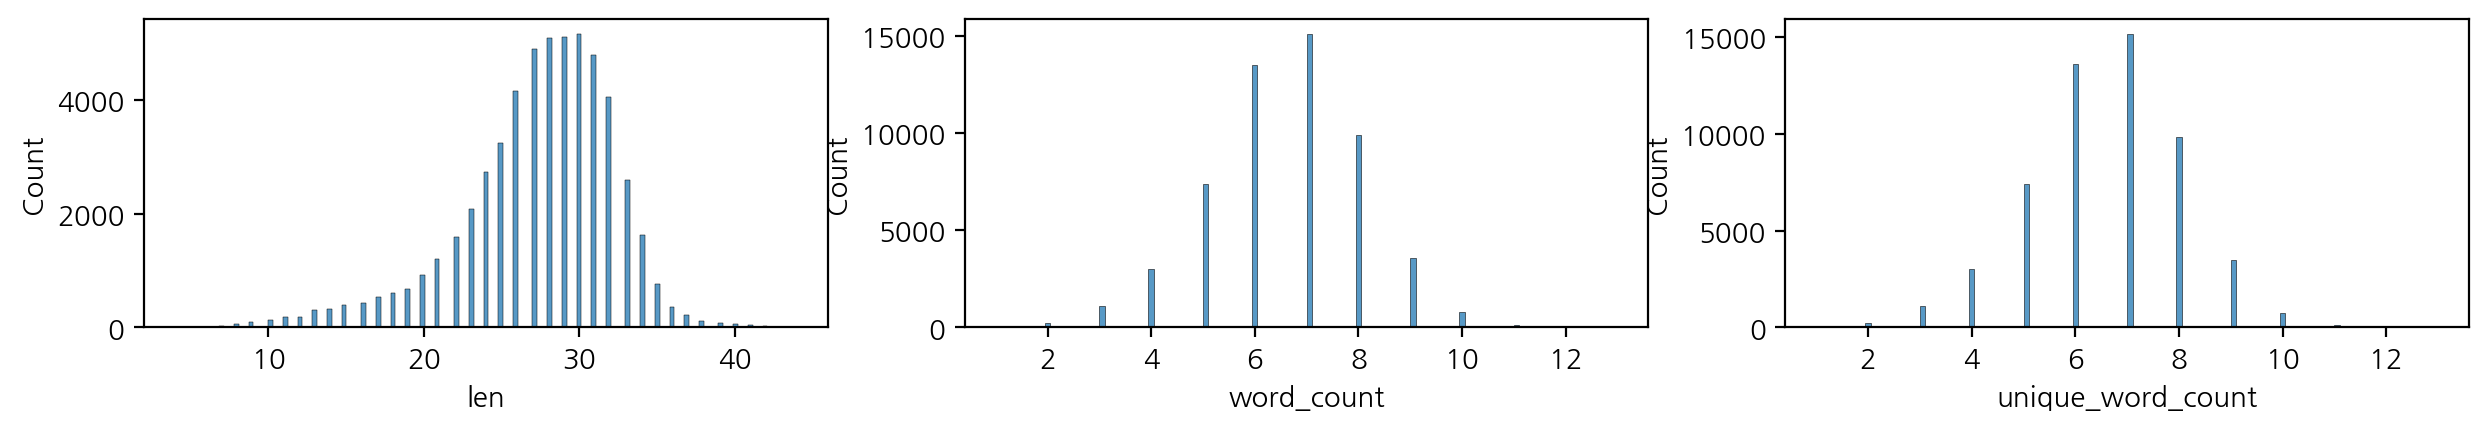

In [25]:
#EDA 분석

# 데이터 시각화

fig, axes = plt.subplots(1, 3, figsize=(15, 2))

sns.histplot(df['len'], ax=axes[0]) # 문자 크기
sns.histplot(df['word_count'], ax=axes[1]) # 단어 수
sns.histplot(df['unique_word_count'], ax=axes[2]) # 유일한 단어 수


In [26]:
df[['len', 'word_count','unique_word_count']]

,len,word_count,unique_word_count
0,24,5,5
1,30,6,6
2,30,8,8
3,32,7,7
4,25,7,7
...,...,...,...
54780,28,6,6
54781,29,7,7
54782,28,9,9
54783,29,6,6


In [27]:
df[['len', 'word_count','unique_word_count']].describe()


,len,word_count,unique_word_count
count,54785.000000,54785.000000,54785.000000
mean,27.318846,6.587880,6.576198
std,4.947738,1.471852,1.465320
min,4.000000,1.000000,1.000000
25%,25.000000,6.000000,6.000000
50%,28.000000,7.000000,7.000000
75%,31.000000,8.000000,8.000000
max,44.000000,13.000000,13.000000


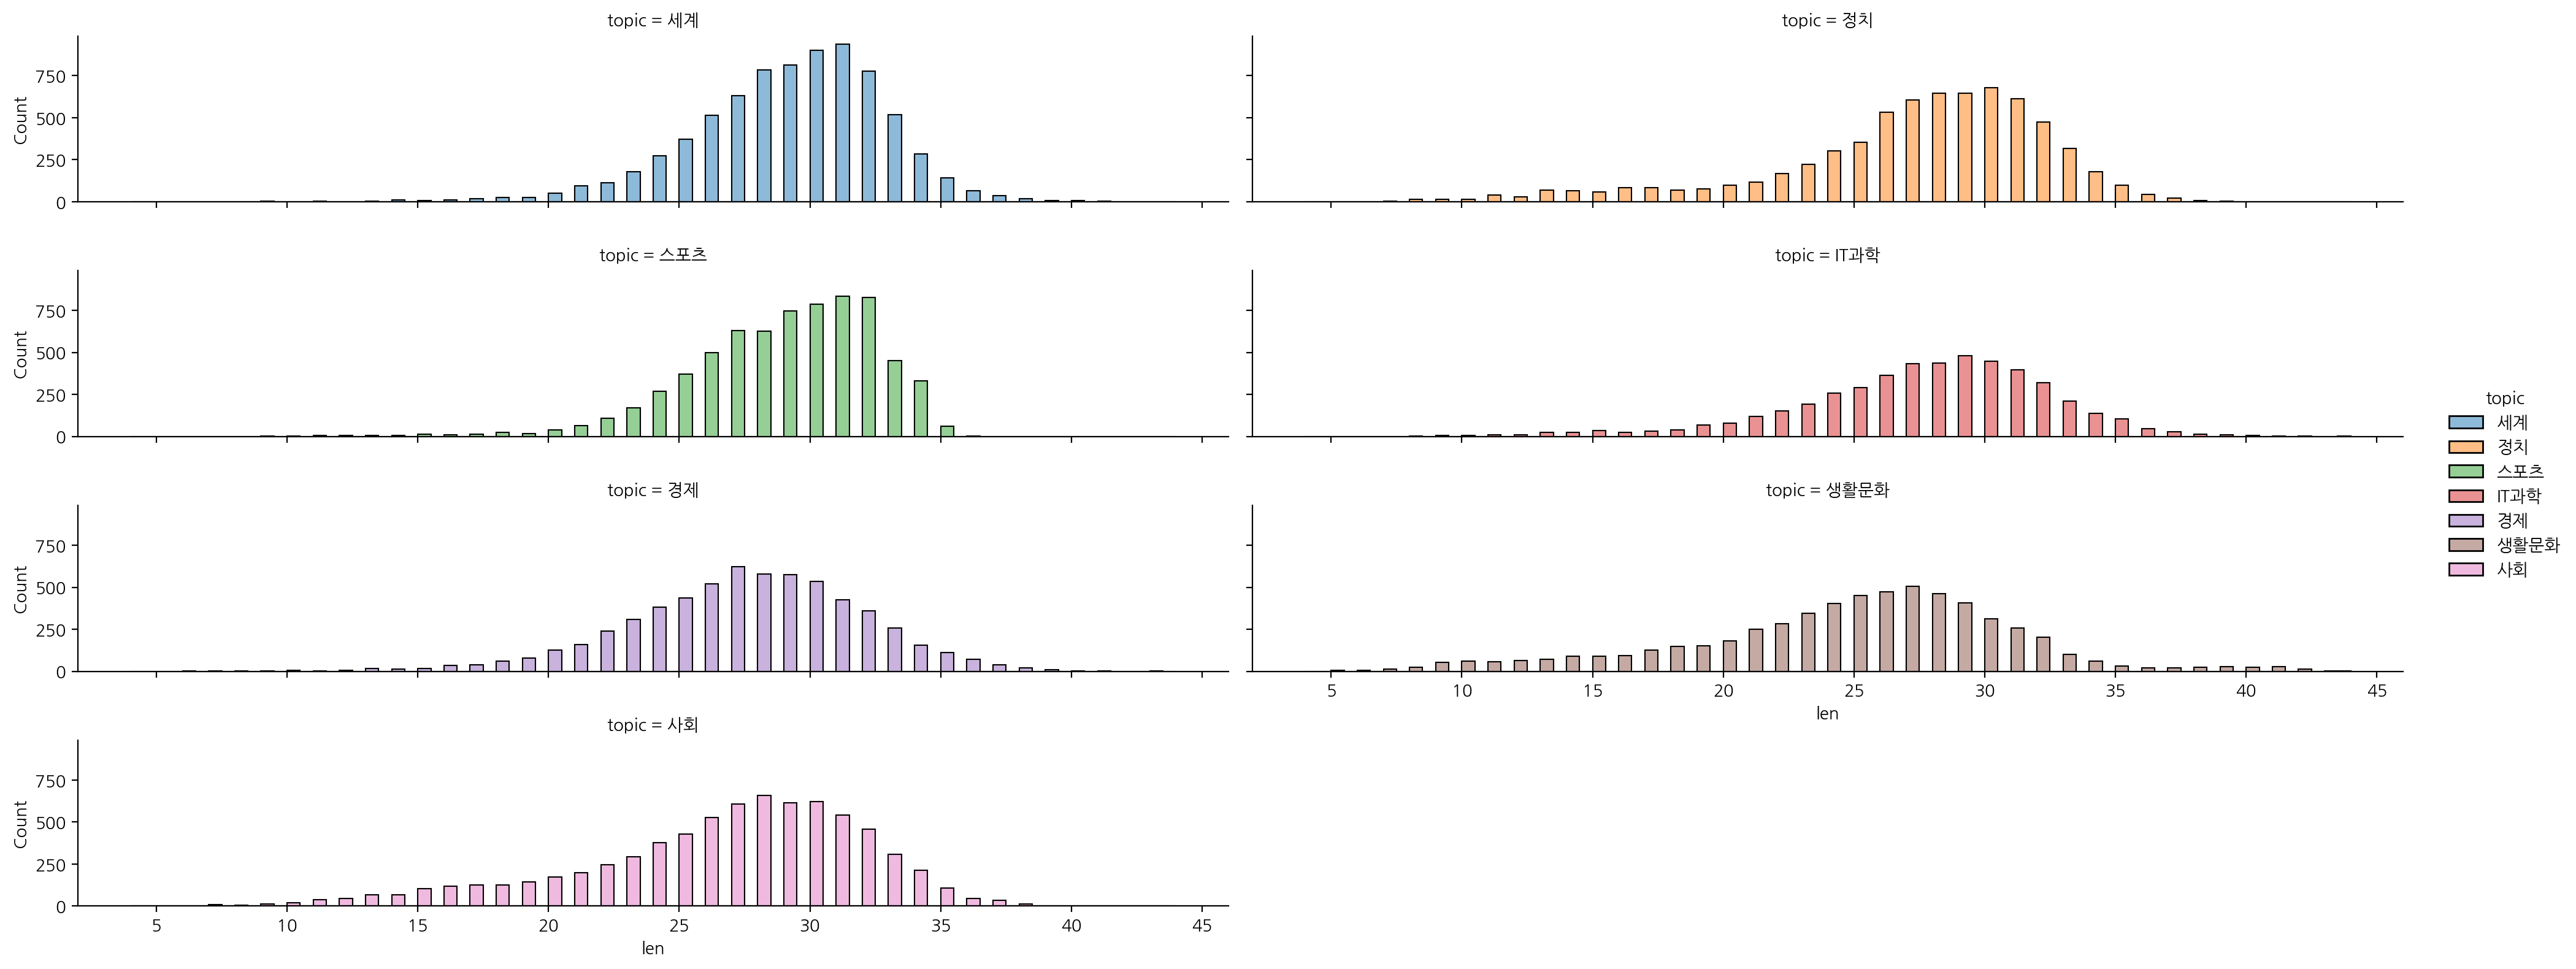

In [28]:
#주제별 (topic) 글자와 단어 길이 확인

sns.displot(df, x='len', hue = 'topic', col='topic',
             col_wrap = 2, aspect=5, height=2, binwidth=0.5)

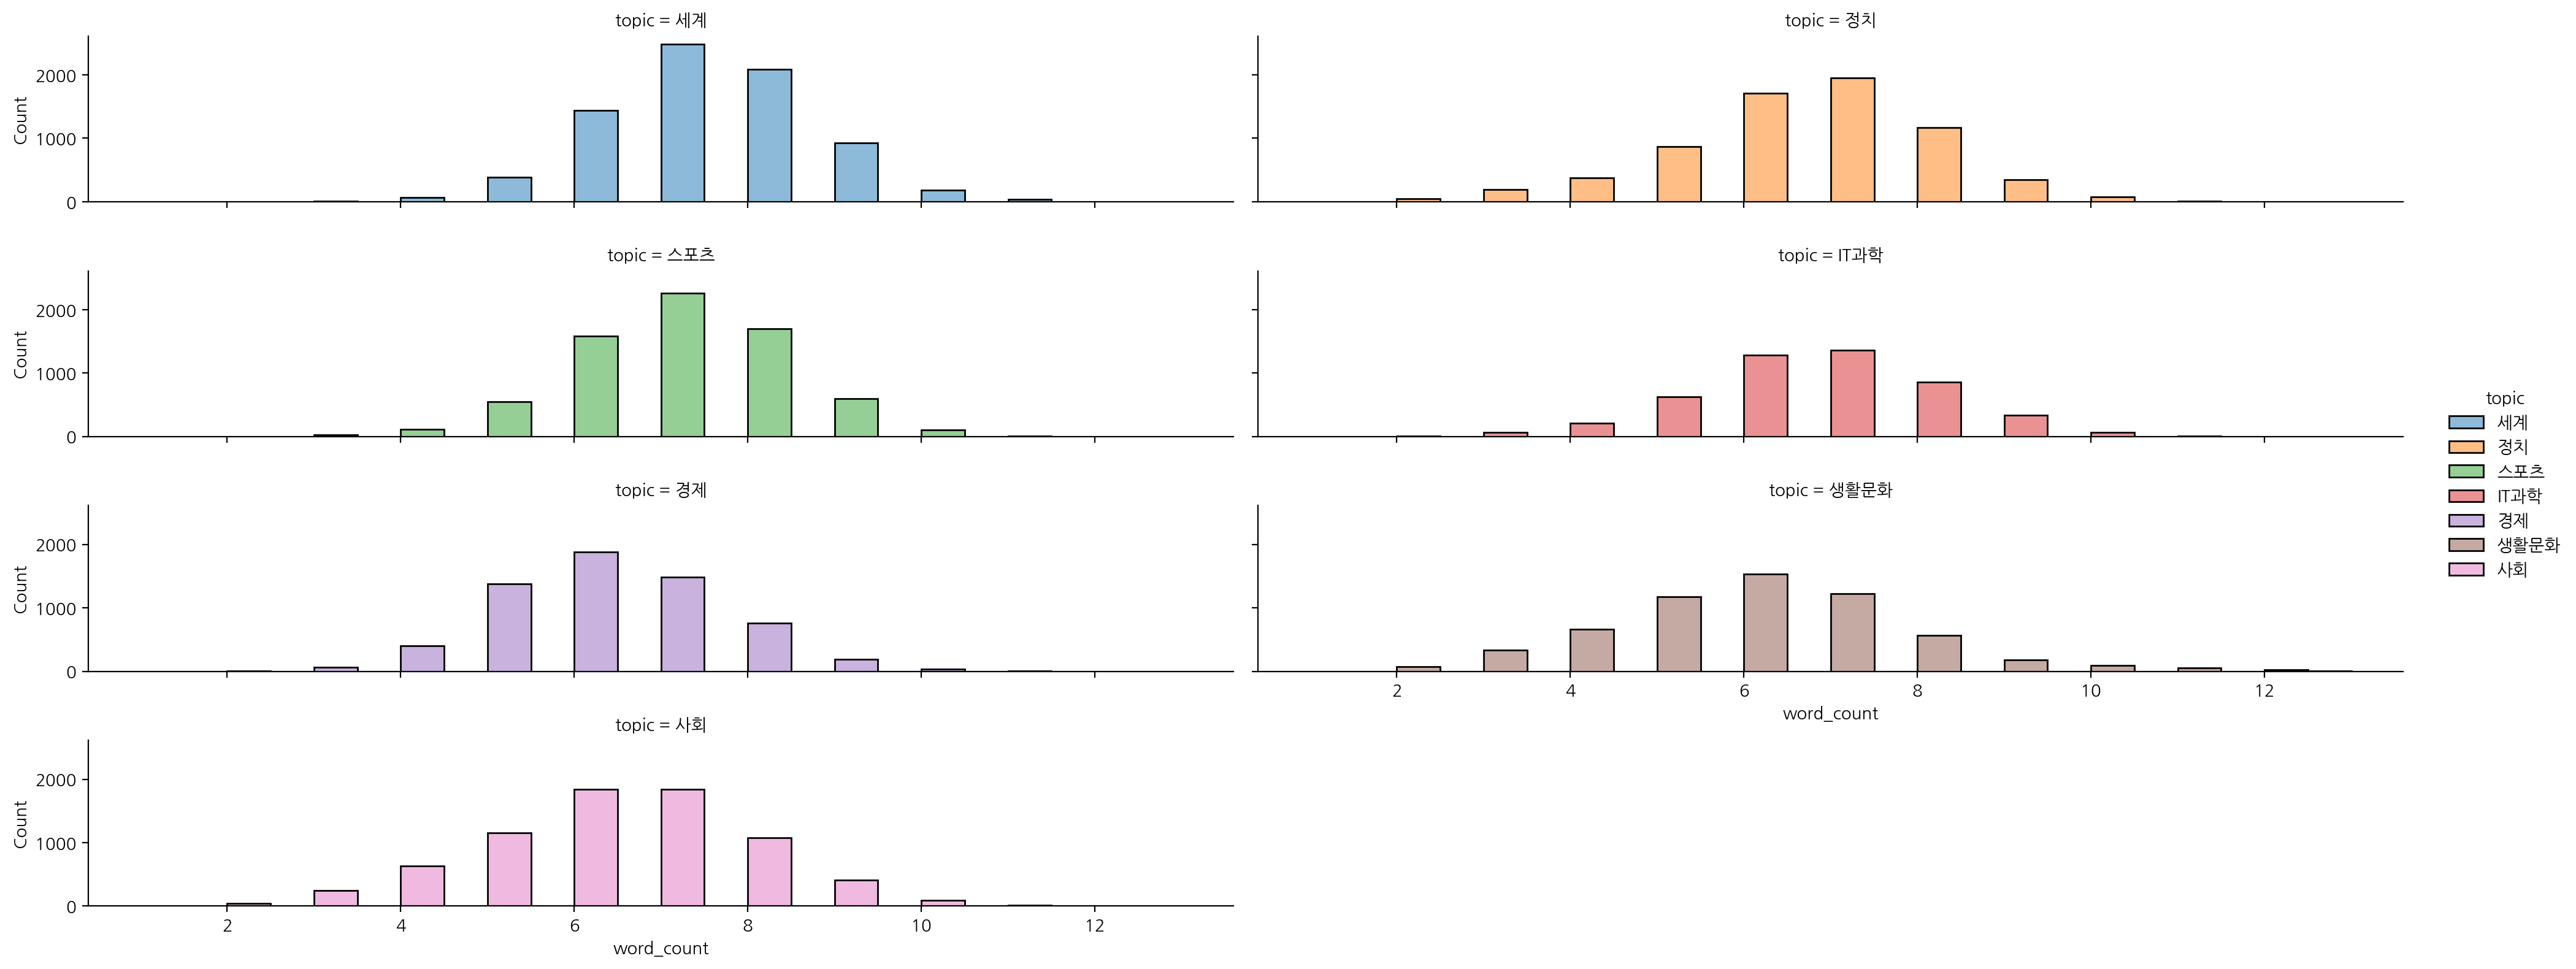

In [29]:
# 주제별 단어 빈도 수 확인

sns.displot(df, x='word_count', hue = 'topic', col='topic',
             col_wrap = 2, aspect=5, height=2, binwidth=0.5)

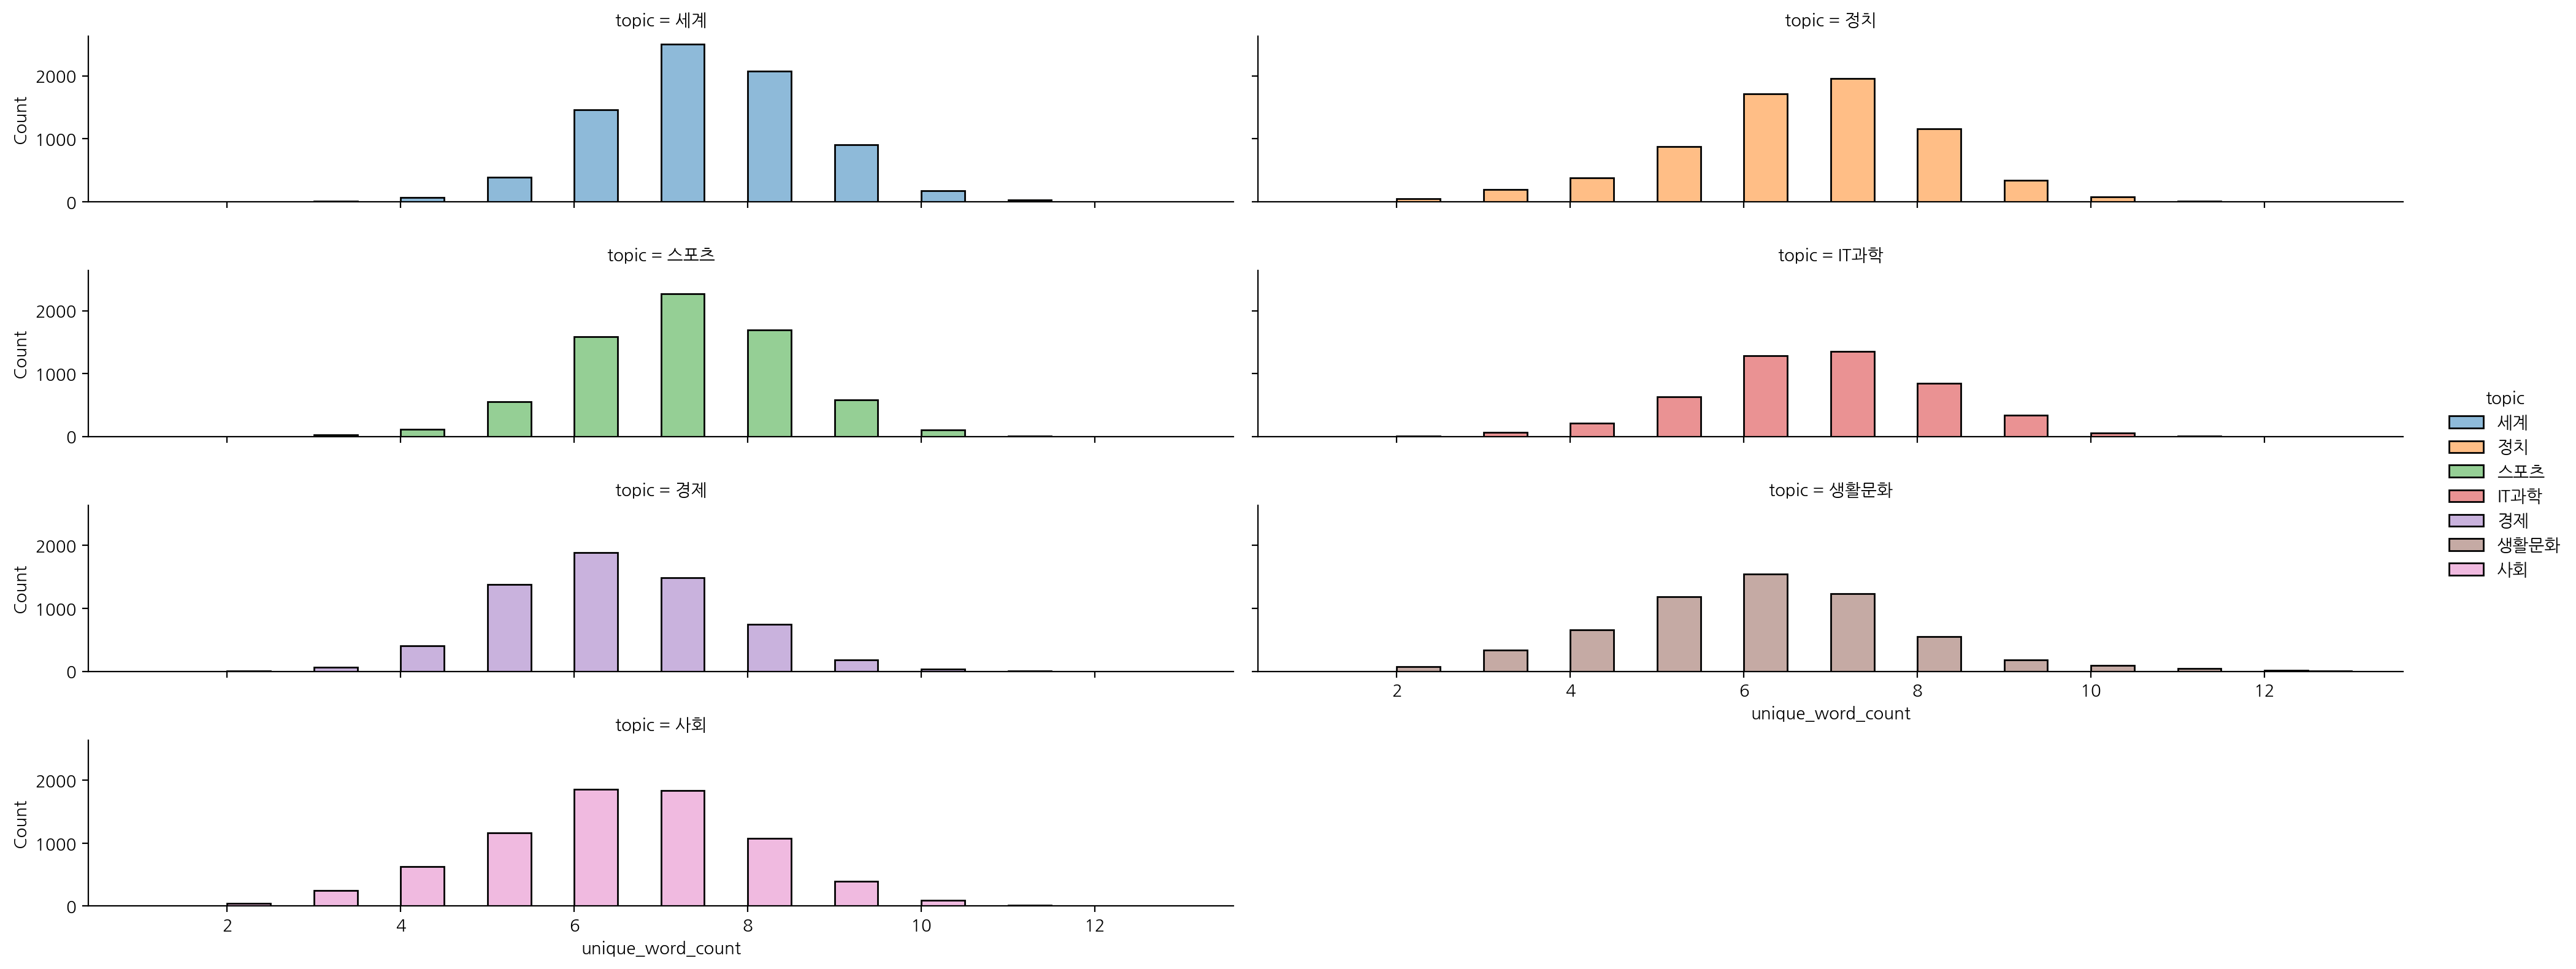

In [30]:
sns.displot(df, x='unique_word_count', hue = 'topic', col='topic',
             col_wrap = 2, aspect=5, height=2, binwidth=0.5)

#col_wrap = 2 한 행에 최대 2개의 그래프 배치
#aspect = 5 세로를 가로의 5배 올리기

In [31]:
# 문자 전처리
# 숫자 제거 / 영문자 (소문자 통일) / 불용어 제거 / 조사, 어미, 구두점 제거
import re

df['title'].str.replace("[0-9]", "", regex=True) #숫자 제거

0                인천→핀란드 항공기 결항…휴가철 여행객 분통
1            실리콘밸리 넘어서겠다…구글 조원 들여 美전역 거점화
2          이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것
3        NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합
4               시진핑 트럼프에 중미 무역협상 조속 타결 희망
                       ...               
54780             인천 오후 시분 대설주의보…눈 .cm 쌓여
54781       노래방에서 지인 성추행 외교부 사무관 불구속 입건종합
54782           년 전 부마항쟁 부산 시위 사진 점 최초 공개
54783       게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계
54784     유영민 과기장관 강소특구는 지역 혁신의 중심…지원책 강구
Name: title, Length: 54785, dtype: object

In [32]:
df['title'] = df['title'].str.replace("[0-9]", "", regex=True)

In [33]:
# 영문자 : 대소문자 구분함 >> 소문자로 통일

df['title'] = df['title'].str.lower()
df['title']

0                인천→핀란드 항공기 결항…휴가철 여행객 분통
1            실리콘밸리 넘어서겠다…구글 조원 들여 美전역 거점화
2          이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것
3        nyt 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합
4               시진핑 트럼프에 중미 무역협상 조속 타결 희망
                       ...               
54780             인천 오후 시분 대설주의보…눈 .cm 쌓여
54781       노래방에서 지인 성추행 외교부 사무관 불구속 입건종합
54782           년 전 부마항쟁 부산 시위 사진 점 최초 공개
54783       게시판 아리랑tv 아프리카개발은행 총회 개회식 생중계
54784     유영민 과기장관 강소특구는 지역 혁신의 중심…지원책 강구
Name: title, Length: 54785, dtype: object

In [34]:
test.columns  # topic_idx 없음

# topic이 있다면 학습데이터 / 없다면 평가용 데이터로 분할

Index(['index', 'title'], dtype='object')

In [35]:
#불용어 제거

def remove_stopwords(text):
    tokens = text.split(' ')
    stops = [ '합니다', '하는', '할', '하고', '한다',
             '그리고', '입니다', '그 ', ' 등', '이런', ' 것 ', ' 및 ',' 제 ', ' 더 ']
    meaningful_words = [w for w in tokens if not w in stops]
    return ' '.join(meaningful_words)

In [36]:
df['title'].map(remove_stopwords)

0                인천→핀란드 항공기 결항…휴가철 여행객 분통
1            실리콘밸리 넘어서겠다…구글 조원 들여 美전역 거점화
2          이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것
3        nyt 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합
4               시진핑 트럼프에 중미 무역협상 조속 타결 희망
                       ...               
54780             인천 오후 시분 대설주의보…눈 .cm 쌓여
54781       노래방에서 지인 성추행 외교부 사무관 불구속 입건종합
54782           년 전 부마항쟁 부산 시위 사진 점 최초 공개
54783       게시판 아리랑tv 아프리카개발은행 총회 개회식 생중계
54784     유영민 과기장관 강소특구는 지역 혁신의 중심…지원책 강구
Name: title, Length: 54785, dtype: object

In [37]:
df['title'] = df['title'].map(remove_stopwords)

In [38]:
#조사, 어미, 구두점 제거
# 형태소 분석기
# konlpy okt 분석기

label_name = "topic_idx"

In [39]:
df[label_name]

0        4.0
1        4.0
2        4.0
3        4.0
4        4.0
        ... 
54780    NaN
54781    NaN
54782    NaN
54783    NaN
54784    NaN
Name: topic_idx, Length: 54785, dtype: float64

In [40]:
condition = df[label_name]

train = df[condition.notnull()].copy()
test = df[condition.isnull()].copy()


In [41]:
print(train.shape)
print(test.shape)

(45654, 7)
(9131, 7)


In [42]:
train['title'][:5]

0            인천→핀란드 항공기 결항…휴가철 여행객 분통
1        실리콘밸리 넘어서겠다…구글 조원 들여 美전역 거점화
2      이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것
3    nyt 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합
4           시진핑 트럼프에 중미 무역협상 조속 타결 희망
Name: title, dtype: object

In [43]:
test['title'][:5]


45654          유튜브 내달 일까지 크리에이터 지원 공간 운영
45655            어버이날 맑다가 흐려져…남부지방 옅은 황사
45656        내년부터 국가rd 평가 때 논문건수는 반영 않는다
45657    김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것
45658      회색인간 작가 김동식 양심고백 등 새 소설집 권 출간
Name: title, dtype: object

In [44]:
#형태소 분석기에서 Okt tagger 불러오기
# pos (part of speech, 품사 태깅 - 명사, 동사, 형용사, 부사...)

from konlpy.tag import Okt

okt = Okt()

#어간 추출(stemming) : 조사, 어미, 구두점 제거

def okt_clean(text):
    clean_text = []
    for word in okt.pos(text, stem=True):
        if word[1] not in ['Josa', 'Eomi', 'Punctuation']:
            clean_text.append(word[0])
    return " ".join(clean_text)

from tqdm import tqdm
tqdm.pandas()

train['title'] = train['title'].progress_map(okt_clean)
test['title'] = test['title'].progress_map(okt_clean)


100%|██████████| 9131/9131 [00:12<00:00, 726.83it/s]


In [45]:
# 학습용 , 평가용 데이터 셋 분리

x_train = train['title']
x_test = test['title']

print(x_train.shape)
print(x_test.shape)



(45654,)
(9131,)


In [46]:
y_train = train['topic_idx']

In [47]:
y_train.value_counts()

topic_idx
4.0    7629
2.0    7362
5.0    6933
6.0    6751
1.0    6222
3.0    5933
0.0    4824
Name: count, dtype: int64

In [48]:
y_test = test['topic_idx']
y_test.value_counts()

Series([], Name: count, dtype: int64)

In [50]:
# 벡터화
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer = None,
                ngram_range = (1,2),
                min_df = 3,
                max_df = 0.95)
tfidf_vect.fit(x_train)

TfidfVectorizer(max_df=0.95, min_df=3, ngram_range=(1, 2))

In [51]:
train_tfidf = tfidf_vect.transform(x_train)
test_tfidf = tfidf_vect.transform(x_test)


In [52]:
train_tfidf.shape

(45654, 26053)

In [54]:
test_tfidf.shape

(9131, 26053)

In [56]:
#단어 사전
vocab =  tfidf_vect.get_feature_names_out()
vocab[:10]

array(['aa', 'abs', 'abu', 'ac', 'ac 밀란', 'acl', 'acl 차다', 'afc',
       'afc 챔스리그', 'afc 챔피언스리그'], dtype=object)

In [57]:
print(len(vocab))

26053


In [58]:
# np.sum() 활용, train_feature_vector 값을 모두 더함
np.sum(train_tfidf, axis=0)

matrix([[1.63870401, 1.44835092, 1.44364459, ..., 1.31628288, 1.8150247 ,
         2.35683837]])

In [59]:
dist = np.sum(train_tfidf, axis=0) #가중치 값

In [60]:
pd.DataFrame(dist, columns=vocab)

,aa,abs,abu,ac,ac 밀란,acl,acl 차다,afc,afc 챔스리그,afc 챔피언스리그,...,힐러리 지지,힐러리 트럼프,힐링,힘겹다,힘내다,힘드다,힘들다,힘쓰다,힘차다,힙합
0,1.638704,1.448351,1.443645,1.178914,1.178914,4.714391,1.368398,10.477363,3.615439,1.249048,...,1.159541,9.293351,5.925177,1.924272,3.960517,5.22875,10.003071,1.316283,1.815025,2.356838


In [61]:
vocab_count = pd.DataFrame(dist, columns=vocab)

In [62]:
# 위에서 구한 빈도수를 그래프로 데이터 시각화

vocab_count.T

,0
aa,1.638704
abs,1.448351
abu,1.443645
ac,1.178914
ac 밀란,1.178914
...,...
힘드다,5.228750
힘들다,10.003071
힘쓰다,1.316283
힘차다,1.815025


In [67]:
vocab_count.T[0].sort_values(ascending=False)

하다          605.751671
종합          552.175628
대통령         323.861298
한국          287.005041
신간          227.584147
               ...    
처법 만들어지다      0.811568
국민 열망         0.811568
바라다 권한        0.811568
열망 종합         0.811568
분산 국민         0.811568
Name: 0, Length: 26053, dtype: float64

In [69]:
vocab_count.T[0].sort_values(ascending=False).head(50)


하다     605.751671
종합     552.175628
대통령    323.861298
한국     287.005041
신간     227.584147
삼성     187.679800
되다     183.367567
출시     171.825235
감독     165.825931
lg     165.525210
이란     165.375959
경기     164.038293
없다     162.965803
게시판    161.521121
트럼프    153.995779
kt     153.239426
억원     148.585052
개발     135.750483
서울     134.246027
정부     133.351752
분기     131.813648
투자     131.170591
대다     128.546680
최고     125.485096
지원     125.395118
중국     125.333996
sk     125.301357
올해     124.765766
개최     117.804767
세계     117.314003
민주     114.999651
영업     114.932889
미국     113.006464
공개     112.582547
보다     108.301073
있다     108.141372
작년     107.772402
기술     106.686594
현대     106.627098
기업     106.478198
대표     106.433386
월드컵    105.684546
코로나    105.510597
게임     103.540374
그래픽    102.825654
시장     102.402184
최대     101.409585
북한     101.331726
김정은     99.990652
축제      99.112445
Name: 0, dtype: float64

<Axes: >

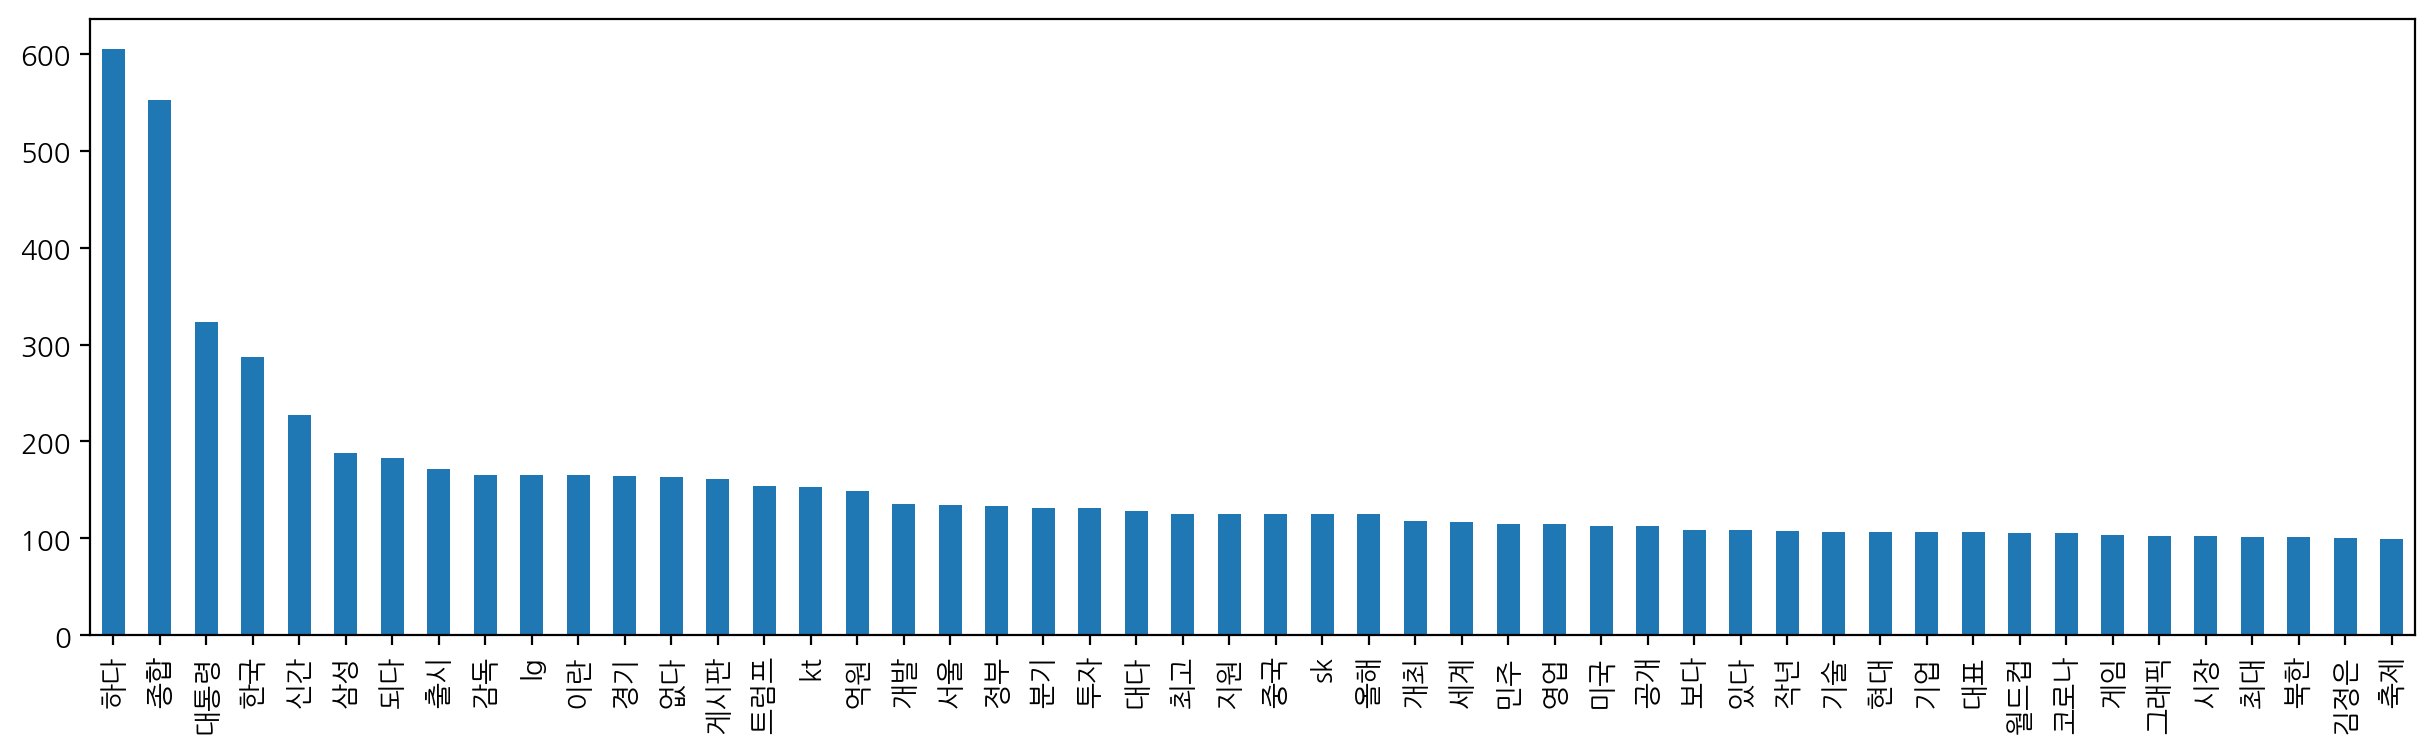

In [70]:
vocab_count.T[0].sort_values(ascending=False).head(50).plot.bar(figsize= (15,4))

In [71]:
# 모델링 (학습 및 예측)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42) #n_jobs=-1, 전체 코어를 다 쓴다.


In [72]:
#교차 검증
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(rf, train_tfidf, y_train, cv=3, n_jobs=-1, verbose=1)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  4.4min finished


In [73]:
#교차 검증 정확도

(y_pred == y_train).mean()

0.7698120646602707

In [75]:
valid_acc = (y_pred == y_train).mean()
round(valid_acc, 2)

0.77

In [77]:
pd.DataFrame({'pred' : y_pred, 'train': y_train})

,pred,train
0,2.0,4.0
1,1.0,4.0
2,4.0,4.0
3,6.0,4.0
4,4.0,4.0
...,...,...
45649,1.0,1.0
45650,2.0,2.0
45651,1.0,1.0
45652,2.0,2.0


In [79]:
df_acc = pd.DataFrame({'pred' : y_pred, 'train': y_train})
df_acc['acc'] = (y_pred == y_train)

In [80]:
df_acc.head()

,pred,train,acc
0,2.0,4.0,False
1,1.0,4.0,False
2,4.0,4.0,True
3,6.0,4.0,False
4,4.0,4.0,True


In [81]:
df_acc.groupby(['train'])['acc'].mean()

train
0.0    0.810738
1.0    0.728544
2.0    0.624287
3.0    0.806843
4.0    0.725783
5.0    0.902640
6.0    0.818101
Name: acc, dtype: float64

In [84]:
import time


In [82]:
%time rf.fit(train_tfidf, y_train)  #학습

RandomForestClassifier(n_jobs=-1, random_state=42)

In [83]:
#예측

y_pred = rf.predict(test_tfidf)
y_pred[:5]

array([2., 3., 0., 2., 3.])